In [1]:
import numpy as np
import multiprocessing as mp
from scipy.stats import norm, normaltest, ttest_1samp
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from jobs import simulate_job
from config_plt import config_plt, get_fig_ax, save_my_fig

In [2]:
mp.set_start_method("spawn", force=True)
T = 100_000
n_reps = 10_000
a_target = 100
n_jobs = 8
args = [(seed, T, a_target) for seed in range(n_reps)]
with mp.Pool(processes=n_jobs) as pool:
    results = list(tqdm(pool.imap_unordered(simulate_job, args, chunksize=1), total=n_reps))

100%|█████████████████████████████████████████████████████████████████████████████| 10000/10000 [04:06<00:00, 40.63it/s]


In [3]:
psis = np.asarray([r["psi"] for r in results])
psis_naive = np.asarray([r["psi_naive"] for r in results])
tauhats = np.asarray([r["tauhat"] for r in results])
taus = np.asarray([r["tau"] for r in results])
equal_groups = np.asarray([r["equal_group"] for r in results])
t_targets = np.asarray([r["t_target"] for r in results])
us = tauhats - taus
zs = us / np.sqrt(psis / T)
zs_naive = us / np.sqrt(psis_naive / T)

In [4]:
psis_equal = psis[equal_groups]
psis_equal_mean = np.mean(psis_equal)
print(psis_equal_mean)
psis_naive_equal = psis_naive[equal_groups]
psis_naive_equal_mean = np.mean(psis_naive_equal)
print(psis_naive_equal_mean)

psis_unequal = psis[~equal_groups]
psis_unequal_mean = np.mean(psis_unequal)
print(psis_unequal_mean)
psis_naive_unequal = psis_naive[~equal_groups]
psis_naive_unequal_mean = np.mean(psis_naive_unequal)
print(psis_naive_unequal_mean)

32.49942027075987
32.500380643217404
245.3933269101182
168.21702768259095


TtestResult(statistic=np.float64(-0.5076203810092121), pvalue=np.float64(0.6117307908727374), df=np.int64(9999))
TtestResult(statistic=np.float64(-0.2187603513501538), pvalue=np.float64(0.8268411985472013), df=np.int64(9999))
NormaltestResult(statistic=np.float64(3.3167142738235564), pvalue=np.float64(0.19045160914660522))
./figures/z


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


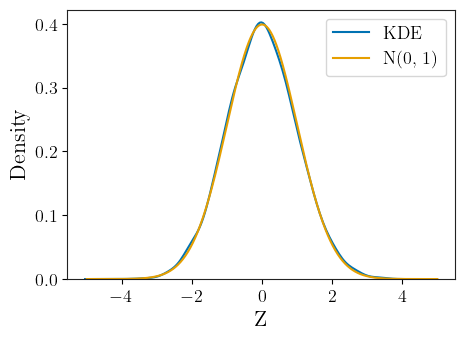

In [5]:
print(ttest_1samp(zs, popmean=0.))
print(ttest_1samp(zs**2, popmean=1.))
print(normaltest(zs))
fig, ax = get_fig_ax()
ax = sns.kdeplot(zs, ax=ax, bw_method=0.2, label="KDE")
zs_vals = np.linspace(-5, 5, 1000)
gaussian_pdf_vals = norm.pdf(zs_vals)
ax.plot(zs_vals, gaussian_pdf_vals, label="N(0, 1)")
ax.set_xlabel("Z")
ax.legend()
save_my_fig(fig, "z")

TtestResult(statistic=np.float64(-0.6353709036001001), pvalue=np.float64(0.5252010797976139), df=np.int64(9999))
TtestResult(statistic=np.float64(12.779312963009458), pvalue=np.float64(4.171635976319819e-37), df=np.int64(9999))
NormaltestResult(statistic=np.float64(6.843979811145992), pvalue=np.float64(0.032647405005600226))
./figures/z-naive


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


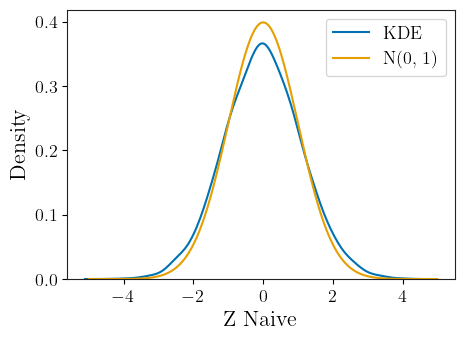

In [6]:
print(ttest_1samp(zs_naive, popmean=0.))
print(ttest_1samp(zs_naive**2, popmean=1.))
print(normaltest(zs_naive))
fig, ax = get_fig_ax()
ax = sns.kdeplot(zs_naive, ax=ax, bw_method=0.2, label="KDE")
ax.plot(zs_vals, gaussian_pdf_vals, label="N(0, 1)")
ax.set_xlabel("Z Naive")
ax.legend()
save_my_fig(fig, "z-naive")

TtestResult(statistic=np.float64(-1.154201760877776), pvalue=np.float64(0.24844504605111958), df=np.int64(9999))
NormaltestResult(statistic=np.float64(384.7430713094384), pvalue=np.float64(2.845139662208604e-84))
./figures/u


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


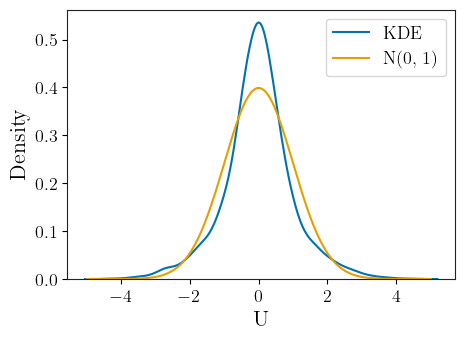

In [7]:
us_std = us / np.std(us)
print(ttest_1samp(us_std, popmean=0.))
# print(ttest_1samp(us_std**2, popmean=1.))
print(normaltest(us_std))
fig, ax = get_fig_ax()
ax = sns.kdeplot(us_std, bw_method=0.2, ax=ax, label="KDE")
ax.plot(zs_vals, gaussian_pdf_vals, label="N(0, 1)")
ax.set_xlabel("U")
ax.legend()
save_my_fig(fig, "u")

(array([  28.,  260., 1284., 2630., 2696., 1974.,  827.,  258.,   36.,
           7.]),
 array([151. , 161.8, 172.6, 183.4, 194.2, 205. , 215.8, 226.6, 237.4,
        248.2, 259. ]),
 <BarContainer object of 10 artists>)

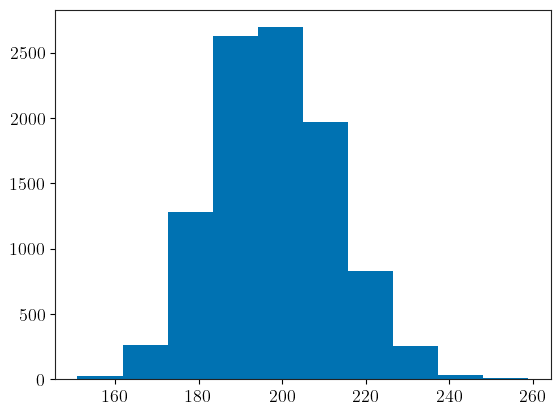

In [8]:
plt.hist(t_targets)

(array([  19.,  126.,  384., 1181., 3876., 3198.,  844.,  293.,   64.,
          15.]),
 array([0.83496742, 0.86874939, 0.90253136, 0.93631332, 0.97009529,
        1.00387726, 1.03765923, 1.07144119, 1.10522316, 1.13900513,
        1.1727871 ]),
 <BarContainer object of 10 artists>)

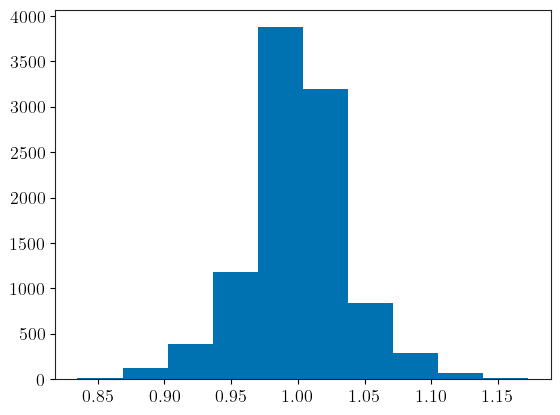

In [9]:
plt.hist(tauhats)

(array([   4.,   18.,  164.,  957., 2428., 3283., 2183.,  814.,  137.,
          12.]),
 array([0.97718062, 0.98138012, 0.98557961, 0.98977911, 0.9939786 ,
        0.99817809, 1.00237759, 1.00657708, 1.01077658, 1.01497607,
        1.01917556]),
 <BarContainer object of 10 artists>)

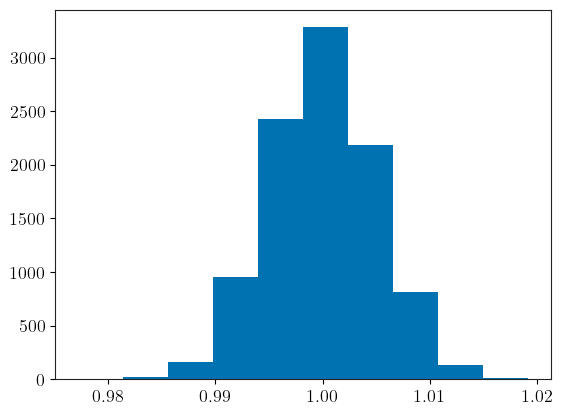

In [10]:
plt.hist(taus)

./figures/psi


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


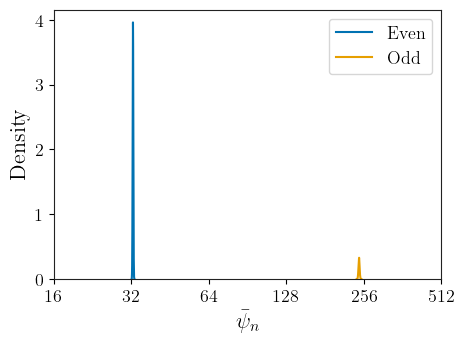

In [11]:
fig, ax = get_fig_ax()
ax = sns.kdeplot(psis_equal, bw_method=0.2, ax=ax, label="Even")
ax = sns.kdeplot(psis_unequal, bw_method=0.2, ax=ax, label="Odd")
ax.set_xlabel("$\\bar{\\psi}_n$")
ax.set_xscale("log", base=2)
xticks = [2**i for i in range(4, 10)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.legend()
save_my_fig(fig, "psi")

In [12]:
def fit_two_component_zero_mean_gmm(x, random_state=0):
    x = np.asarray(x, dtype=float).reshape(-1, 1)
    gmm = GaussianMixture(
        n_components=2,
        covariance_type="spherical",
        n_init=10,
        init_params="random_from_data",
        random_state=random_state,
        reg_covar=1e-8,
        max_iter=1000,
        tol=1e-6,
        weights_init=np.array([0.5, 0.5]),
        means_init=np.array([(0.,), (0.,)])
    )
    gmm.fit(x)
    pi = gmm.weights_
    sigmas = np.sqrt(gmm.covariances_)
    means = gmm.means_.ravel()
    loglik = gmm.score(x) * x.size

    # Enforce ordering (sigma1 <= sigma2) for identifiability
    order = np.argsort(sigmas)
    pi = pi[order]
    sigmas = sigmas[order]
    means = means[order]

    # Print results
    print(f"pi: {pi}")
    print(f"sigmas: {sigmas}")
    print(f"means: {means}")

fit_two_component_zero_mean_gmm(us * np.sqrt(T))
print(f"sqrt(Avg psi_equal): {np.sqrt(psis_equal_mean)}")
print(f"sqrt(Avg psi_unequal): {np.sqrt(psis_unequal_mean)}")

pi: [0.48331595 0.51668405]
sigmas: [ 5.55108366 15.5357847 ]
means: [-0.05231703 -0.21501789]
sqrt(Avg psi_equal): 5.700826279651036
sqrt(Avg psi_unequal): 15.66503517104632
